# Numerical Integration: Gaussian–Legendre Quadrature
---
## Gaussian-Legendre quadrature is a numerical integration method also called the "Gaussian quadrature" or "Legendre quadrature".

<img src="https://pic4.zhimg.com/v2-10260b396a3c8fb2e48618da85861338_1200x500.jpg" width=500>

---
## Gaussian Quadrature

### In numerical analysis, a quadrature rule is an approximation of the definite integral of a function, usually stated as a weighted sum of function values at specified points within the domain of integration.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Comparison_Gaussquad_trapezoidal.svg/440px-Comparison_Gaussquad_trapezoidal.svg.png" width=400>

### The Gaussian quadrature rule is taken as $[-1,\,1]$ and written in the form
### $$G_n(f) = \sum_{i = 1}^n w_i^{(n)} f(x_i^{(n)}) \approx \int_{-1}^1 f(x)\,dx,$$
### where the weight $w_i^{(n)}$ and Gaussian points $x_i^{(n)}$, and this form is exact for polynomials of degree $2n - 1$ or less.

### This exact rule is known as the Gauss-Legendre quadrature rule. 
### The quadrature rule will only be an accurate approximation to the integral above if $f(x)$ is well-approximated by a polynomial of degree $2n - 1$ or less on $[-1,\,1]$.

---
## Gaussian–Legendre Quadrature
---
### For the simplest integration problem stated above, i.e., $f(x)$ is well-approximated by polynomials on $[-1,\,1]$, the associated orthogonal polynomials are Legendre polynomials, denoted by $P_n(x)$.

### Legendre polynomials can be computed recursively, through following three-term relation
$$P_0(x) = 1,\,P_1(x) = x\quad \text{ and } \quad P_n(x) = \frac{2n - 1}{n}\,x\,P_{n - 1}(x) - \frac{n - 1}{n}\,P_{n - 2}(x) \quad \text{ where } n = 2,\,3,\,\cdots$$

<img src="https://pic4.zhimg.com/v2-10260b396a3c8fb2e48618da85861338_1200x500.jpg" width=500>

### With the $n$-th polynomial normalized to give $P_n(1) = 1$ , the $i$-th Gauss node, $x_i$, is the $i$-th root of $P_n$ and the weights are given by the formula
### $$w_i = \frac{2}{(1 - x_i^2)[P_n'(x_i)]^2}$$

### Some low-order quadrature rules are tabulated below (over interval $[−1,\, 1]$, see the section below for other intervals).

#### More information: [link](https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss%E2%80%93Legendre_quadrature) 

---
## Implementation

### Part 0. Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This library is used to get the weights and point of Gaussian–Legendre
from scipy.special.orthogonal import p_roots

#### The reference of <code>scipy.special.orthogonal.p_roots</code>: [link](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.special.p_roots.html)

### Part 1. Implement Legendre polynomial

In [2]:
def Legendre(
    n,
    x
):
    '''
    Parameters
    ----------
    n : integer
        degree
    x : float
        a point or points
        
    Returns
    -------
    float
    '''
    
    x = np.array(x)
    
    if (n == 0):
        return x*0 + 1.0
    
    elif (n == 1):
        return x
    
    else:
        return ((2.0 * n - 1.0) * x * Legendre(n-1, x) - (n - 1) * Legendre(n - 2, x)) / n

### Plot the Legendre polynomials of degree 0 to 5 on the interval $[-1,\,1]$

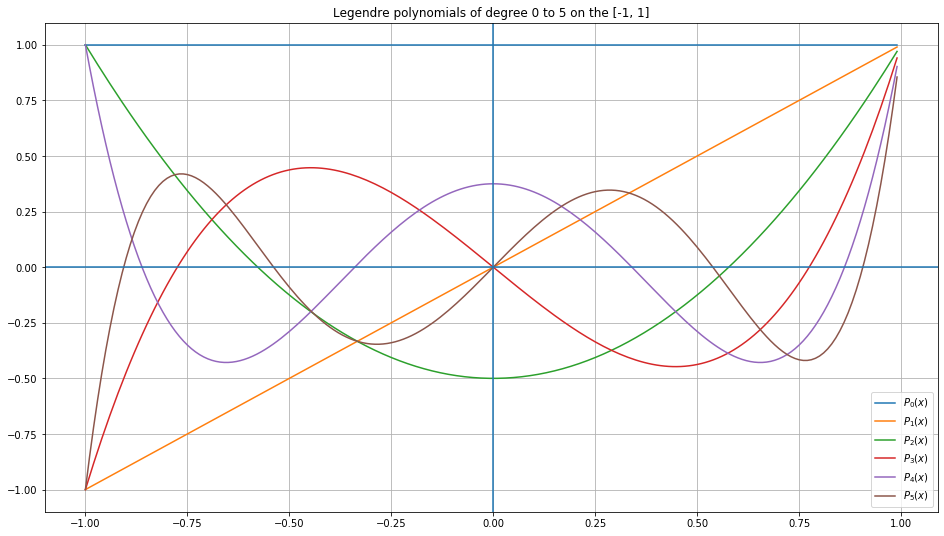

In [3]:
# Set the range of x to [-1,1]
x_range = np.arange(-1, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot Legendre polynomials of degree 0 to 5
for n in range(6):
    ax.plot(x_range, Legendre(n, x_range), label = '$P_{'+str(n)+'}(x)$')

# Add other text and items
ax.set_title('Legendre polynomials of degree 0 to 5 on the [-1, 1]')
plt.legend(loc='lower right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Part 2. Implement Gaussian–Legendre quadrature on the interval $[-1,\,1]$

In [4]:
def gauss1(
    f,
    n
):
    '''
    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    n : integer
        Number of points

    Returns
    -------
    G : float
        Approximation of the integral of f(x) from a to b using the
        Gaussian–Legendre quadrature rule with N points.
    '''
    
    # Get the weights and point of Gaussian–Legendre
    [x, w] = p_roots(n)
    
    # Compute the Gaussian–Legendre quadrature integration
    G = sum(w * f(x))
    
    return G

---
## Example

### 1. Compute the function on integrals for which we know the exact value.
### $$\int_1^{-1}\,x^2\,dx = \frac{2}{3}$$ 

In [5]:
for n in range(1, 11):
    approximation = gauss1(lambda x : x**2, n)
    print('The approximate value of n =', n, 'is', approximation)

The approximate value of n = 1 is 0.0
The approximate value of n = 2 is 0.6666666666666666
The approximate value of n = 3 is 0.666666666666667
The approximate value of n = 4 is 0.6666666666666666
The approximate value of n = 5 is 0.6666666666666665
The approximate value of n = 6 is 0.6666666666666664
The approximate value of n = 7 is 0.6666666666666671
The approximate value of n = 8 is 0.666666666666666
The approximate value of n = 9 is 0.6666666666666664
The approximate value of n = 10 is 0.6666666666666651


---
### Part 3. Implement Gaussian–Legendre quadrature on the interval $[a,\,b]$

### This change of interval can be done in the following way:
### $$\int_a^b\,f(x)\,dx = \frac{b - a}{2}\,\int_1^{-1}\,f\left( \frac{b - a}{2} x + \frac{a + b}{2}\right)\,dx$$

### Applying the Gaussian quadrature rule then results in the following approximation:
### $$\int_a^b\,f(x)\,dx \approx \sum_{i = 1}^n w_i\,f\left( \frac{a + b}{2}x_i + \frac{a + b}{2} \right)$$

In [6]:
def gauss(
    f,
    n,
    a,
    b
):
    '''
    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    n : integer
        Number of points
    a , b : numbers
        Interval of integration [a,b]

    Returns
    -------
    G : float
        Approximation of the integral of f(x) from a to b using the
        Gaussian–Legendre quadrature rule with N points.
    '''
    
    # Get the weights and point of Gaussian–Legendre
    [x, w] = p_roots(n + 1)
    
    # Compute the Gaussian–Legendre quadrature integration
    G = 0.5 * (b - a) * sum(w * f(0.5 * (b - a) * x + 0.5 * (b + a)))
    
    return G

---
## Example
### 1. Compute another function on integrals for which we know the exact value.
### $$\int_0^{\frac{\pi}{2}}\,\sin x\,dx = 1$$

In [7]:
for n in range(1, 11):
    approximation = gauss(np.sin, n, 0, np.pi/2)
    print('The approximate value of n =', n, 'is', approximation)

The approximate value of n = 1 is 0.9984726134041148
The approximate value of n = 2 is 1.0000081215554981
The approximate value of n = 3 is 0.999999977197115
The approximate value of n = 4 is 1.0000000000395652
The approximate value of n = 5 is 0.9999999999999535
The approximate value of n = 6 is 1.0
The approximate value of n = 7 is 1.0
The approximate value of n = 8 is 1.0
The approximate value of n = 9 is 1.0000000000000002
The approximate value of n = 10 is 1.0


## End